Esse projeto é uma simples analise do famoso conjunto de dados Iris, que é basicamente o primeiro conjunto de dados que as pessoas aprendem a mexer. Fiz um overall rapidamente só para ter uma noção do que é possivel realizar e ver oque contem dentro desse conjunto de dados.

In [54]:
#Biblioteca utilizadas para o projeto
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

Nessa primeira parte do projeto vamos visualizar os dados e ver como esta o seu comportamento. Conseguimos notar as quatro primeiras colunas estão relacionado com o tamanho e o peso da sepala (parte abaixo da petala da flor) e o tamanho e o peso da petala e por fim a classe da flor.

In [55]:
Data = pd.read_csv('iris.csv')
Data.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Temos três opçoes de classes e nenhuma linha nula, podemos começar a visualizar os dados.

In [56]:
# Três opções para classe
Data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [57]:
Data.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

# Visualização dos Dados

Podemos plotar o histograma das quatro colunas, no histograma do Sepal Width temos uma maior aglomeração das classes, mas é nitido que a classe Iris-setosa esta separada nas demais com seus valores, enquanto as demais tendem ter valores um pouco mais proximo.

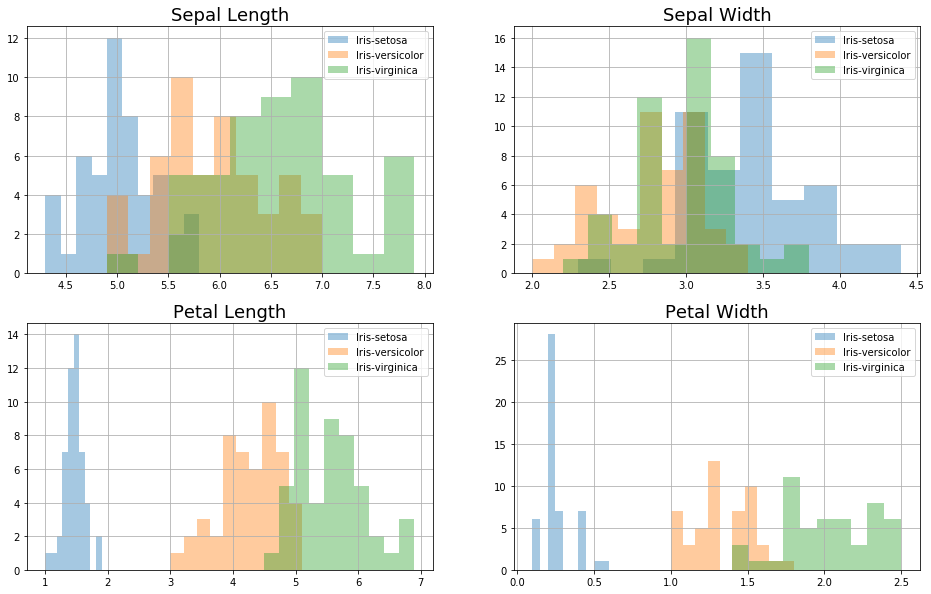

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(2,2, figsize=(16,10))

Data.groupby("class").sepallength.hist(alpha=0.4, ax = ax[0,0]);
Data.groupby("class").sepalwidth.hist(alpha=0.4, ax = ax[0,1]);
Data.groupby("class").petallength.hist(alpha=0.4,ax = ax[1,0]);
Data.groupby("class").petalwidth.hist(alpha=0.4,ax = ax[1,1]);

ax[0][0].set_title("Sepal Length", fontsize=18);
ax[0][1].set_title("Sepal Width", fontsize=18);
ax[1][0].set_title("Petal Length", fontsize=18);
ax[1][1].set_title("Petal Width", fontsize=18);

ax[0][0].legend(Data['class'].unique());
ax[0][1].legend(Data['class'].unique());
ax[1][0].legend(Data['class'].unique());
ax[1][1].legend(Data['class'].unique());


Plotando o scatterplot das colunas relacionado com as classes conseguimos corrobora oque foi dito anteriormente. Com isso podemos achar que a classificação da Iris-setosa (azul) será mais facil do que as demais.

C:\Users\gusta\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


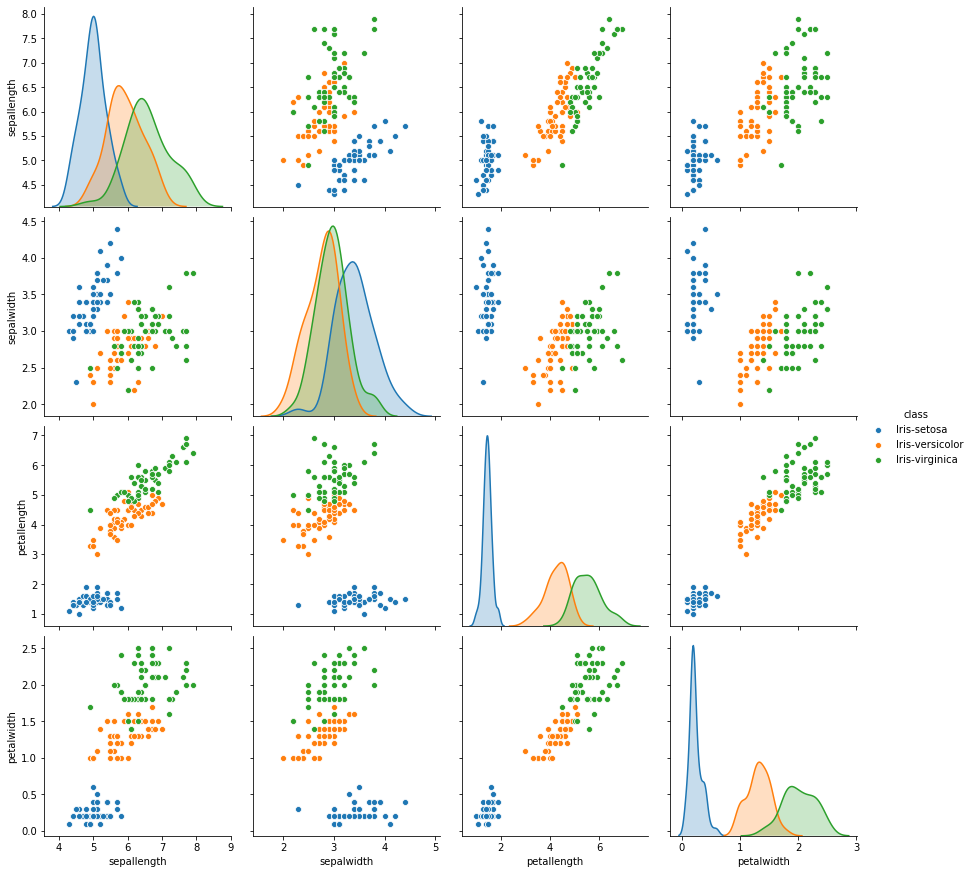

In [59]:
sns.pairplot(Data,hue="class",size=3);

# Modelando os dados


In [60]:
X = Data.drop("class",axis=1)
y = Data['class']

Para passar no nosso modelo precisamos transformar nossa classe em uma variavel numerica.

In [61]:
label = LabelEncoder()
label.fit(y)

ylab = label.transform(y)

Vamos fazer a analise para 4 modelos diferente:
1. É o KNN, é um modelo de aprendizagem supervisionada, que pode ser utilizado tanto para classificar quanto para predição. O modelo calcula a distancia entre todos os pontos e encontra os 'k' pontos classificados mais proximos. É um modelo simples e facil de entender

2. É o Single Vector Machine (SVM) é um modelo de aprendizagem supervisionada, que pode ser utilizado tanto para classificar quanto para predizer. Basicamente o algoritmo tenta encontrar o melhor hiperplano para distinguir as classes entre os pontos, existindo muitas possibilidades de hiperplanos, tentando sempre encontrar com a melhor margen de limite. Modelo mais complexo para entender porem melhor acuracia

3. É a arvore de decisão é um modelo de aprendizagem supervisionada, que pode ser utilizado tanto para classificar quanto para predizer. Utilizando o conjunto de dados controi pontos de escolhas ,iniciando pela raiz e vai dividindo pelas folhas (com as informações dadas pelo conjunto de dados) e no final vai poder classificar. É facil de entendimento e dependendo do tamanho da arvore é veloz

4. É Random Forest é nada mais que varias arvores de decisões, é simulado para todas essas arvores e cada arvore irá devolver uma predição de classificaçao, qual tiver o maior numero de votos é escolhido. Modelo baseado em arvore de decisão com uma custo computacional maior e nem sempre é melhor que a arvore de decisão sozinha.

Escolhemos as metricas de precisão, recall e F-1 para fazer a analise.

O melhor modelo foi o SVM com 100% para todas as metricas escolhidas, caso tivesse mais dado seria o modelo ideal para utilizar.

Os outros três modelos tiveram problema em classificar a classe Iris-Versicolor, com a precisão de **94%**, relacionado ao numero de vezes que o modelo classificou corretamente a classe relacionado com a quantidade de vezes que a classe foi predita. Também podemos ver as matrix de confusão para ver como as classes foram classificadas.

Report of KNN 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50

Report of Decision Tree 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50

Report of SVM 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1

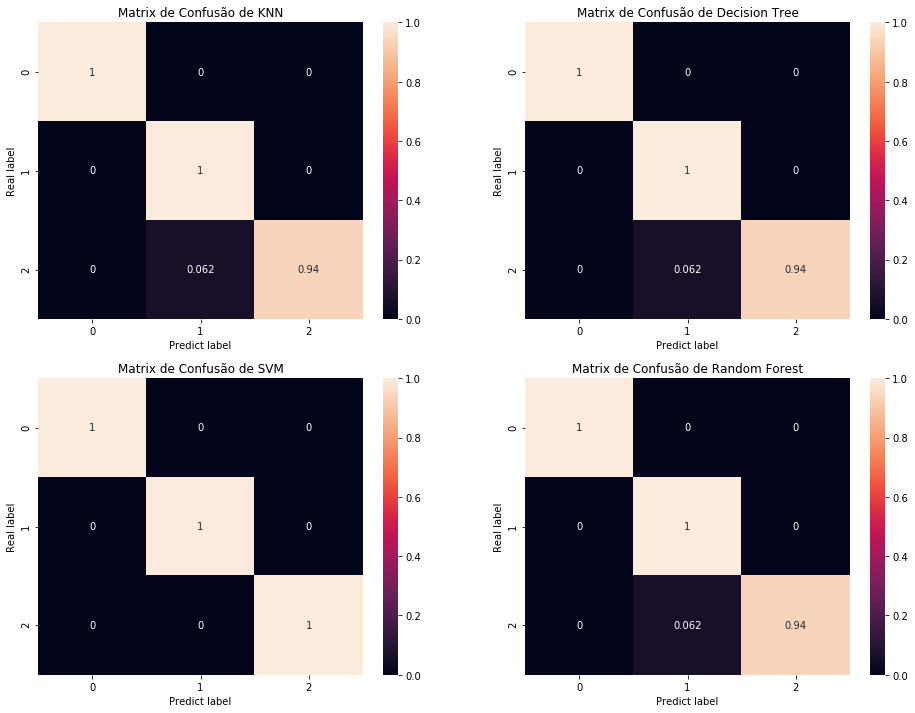

In [62]:
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, ylab, test_size=0.33, random_state=42)

clf_knn = KNeighborsClassifier()
clf_DecisionTree = tree.DecisionTreeClassifier()
clf_SVM = SVC()
clf_RandomForest = RandomForestClassifier()

clf_knn.fit(X_train,y_train)
clf_DecisionTree.fit(X_train,y_train)
clf_SVM.fit(X_train,y_train)
clf_RandomForest.fit(X_train,y_train);

#y_knn = cross_val_predict(clf_knn, X, ylab, cv=5)
y_knn = clf_knn.predict(X_test)
y_DT  = clf_DecisionTree.predict(X_test)
y_SVM = clf_SVM.predict(X_test)
y_RF  = clf_RandomForest.predict(X_test)

nomes_classes = label.inverse_transform([0,1,2])

print('Report of KNN \n')
print(classification_report(y_test,y_knn,target_names=nomes_classes))

print('Report of Decision Tree \n')
print(classification_report(y_test,y_DT,target_names=nomes_classes))

print('Report of SVM \n')
print(classification_report(y_test,y_SVM,target_names=nomes_classes))

print('Report of Random Forest \n')
print(classification_report(y_test,y_RF,target_names=nomes_classes))

cnf_matrix_Knn = confusion_matrix(y_test,y_knn,normalize= 'true')
cnf_matrix_DT  = confusion_matrix(y_test,y_DT,normalize= 'true')
cnf_matrix_SVM = confusion_matrix(y_test,y_SVM,normalize= 'true')
cnf_matrix_RF  = confusion_matrix(y_test,y_RF,normalize= 'true')

fig, ax = plt.subplots(2,2, figsize = (16,12))

sns.heatmap(cnf_matrix_Knn, annot = True, ax = ax[0,0])
sns.heatmap(cnf_matrix_DT, annot = True, ax = ax[0,1])
sns.heatmap(cnf_matrix_SVM, annot = True, ax = ax[1,0])
sns.heatmap(cnf_matrix_RF, annot = True, ax = ax[1,1])


ax[0,0].title.set_text('Matrix de Confusão de KNN')
ax[0,0].set_xlabel('Predict label')
ax[0,0].set_ylabel('Real label')

ax[0,1].title.set_text('Matrix de Confusão de Decision Tree')
ax[0,1].set_xlabel('Predict label')
ax[0,1].set_ylabel('Real label')

ax[1,0].title.set_text('Matrix de Confusão de SVM')
ax[1,0].set_xlabel('Predict label')
ax[1,0].set_ylabel('Real label')

ax[1,1].title.set_text('Matrix de Confusão de Random Forest')
ax[1,1].set_xlabel('Predict label')
ax[1,1].set_ylabel('Real label')
#plt.title('Matrix de Confusão')
plt.show()

Vamos otimizar nossos parametros utilizando o GridSearchCV, escolhemos quais parametros queremos otimizar e a lista dos valores que queremos testar, após isso a função testa para cada valor qual é o melhor dependendo da metrica escolhida, nesse caso utilizaremos a default que é acuracia.

In [63]:
knears_params = {"n_neighbors": list(range(2,20,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

svc_params = {'C': [0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100],'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(1,15,1)), 
            "min_samples_leaf": list(range(1,17,1))}

forest_params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

Grid_KNN = GridSearchCV(KNeighborsClassifier(), knears_params, cv = 5);
Grid_KNN.fit(X_train,y_train);

grid_svc = GridSearchCV(SVC(), svc_params);
grid_svc.fit(X_train, y_train);

grid_tree = GridSearchCV(tree.DecisionTreeClassifier(), tree_params);
grid_tree.fit(X_train, y_train);

grid_Rf = GridSearchCV(RandomForestClassifier(), forest_params);
grid_Rf.fit(X_train, y_train);

In [64]:
Agora podemos repetir o processo realizado anteriormente.

Dessa vez o modelo de arvore de decisão junto com SVM conseguiram ter 100% das metricas utilizadas.

Entretanto não tivemos melhoras nos demais modelos.

SyntaxError: invalid syntax (<ipython-input-64-d628db50d0b8>, line 1)

In [ ]:
clf_knn_grid = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 6)
clf_DecisionTree_Grid = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf= 3)
clf_SVM_Grid = SVC(C = 100,gamma = 0.01, kernel = 'rbf')
clf_RandomForest_Grid = RandomForestClassifier(criterion = 'gini', max_depth = 4, max_features= 'auto',n_estimators = 500)

clf_knn_grid.fit(X_train,y_train)
clf_DecisionTree_Grid.fit(X_train,y_train)
clf_SVM_Grid.fit(X_train,y_train)
clf_RandomForest_Grid.fit(X_train,y_train);

y_knn_grid = clf_knn_grid.predict(X_test)
y_DT_Grid  = clf_DecisionTree_Grid.predict(X_test)
y_SVM_Grid = clf_SVM_Grid.predict(X_test)
y_RF_Grid  = clf_RandomForest_Grid.predict(X_test)

print('Report of KNN \n')
print(classification_report(y_test,y_knn_grid))

print('Report of Decision Tree \n')
print(classification_report(y_test,y_DT_Grid))

print('Report of SVM \n')
print(classification_report(y_test,y_SVM_Grid))

print('Report of Random Forest \n')
print(classification_report(y_test,y_RF_Grid))

cnf_matrix_Knn_grid = confusion_matrix(y_test,y_knn_grid,normalize= 'true')
cnf_matrix_DT_Grid  = confusion_matrix(y_test,y_DT_Grid,normalize= 'true')
cnf_matrix_SVM_Grid = confusion_matrix(y_test,y_SVM_Grid,normalize= 'true')
cnf_matrix_RF_Grid  = confusion_matrix(y_test,y_RF_Grid,normalize= 'true')

fig, ax = plt.subplots(2,2, figsize = (16,12))

sns.heatmap(cnf_matrix_Knn_grid, annot = True, ax = ax[0,0])
sns.heatmap(cnf_matrix_DT_Grid, annot = True, ax = ax[0,1])
sns.heatmap(cnf_matrix_SVM_Grid, annot = True, ax = ax[1,0])
sns.heatmap(cnf_matrix_RF_Grid, annot = True, ax = ax[1,1])


ax[0,0].title.set_text('Matrix de Confusão de KNN')
ax[0,0].set_xlabel('Predict label')
ax[0,0].set_ylabel('Real label')

ax[0,1].title.set_text('Matrix de Confusão de Decision Tree')
ax[0,1].set_xlabel('Predict label')
ax[0,1].set_ylabel('Real label')

ax[1,0].title.set_text('Matrix de Confusão de SVM')
ax[1,0].set_xlabel('Predict label')
ax[1,0].set_ylabel('Real label')

ax[1,1].title.set_text('Matrix de Confusão de Random Forest')
ax[1,1].set_xlabel('Predict label')
ax[1,1].set_ylabel('Real label')
#plt.title('Matrix de Confusão')
plt.show()


# Conclusão

Nesse projeto investigamos um conjunto de parametros ja conhecido que é o Iris e testamos alguns modelo para ver seu funcionamento. No final encontramos 2 modelos que conseguirarm fazer a classificação perfeitamente que foi o SVM e a arvore de decisão, entretanto os outros modelos não ficaram para trás.

Nesse projeto levamos em consideração todas as colunas, porem é possivel fazer uma analise 2 colunas apenas para ver se melhora tambem os valores de metricas. Como temos poucos dados eu decidi deixar sem fazer limpeza de outliers para não perder nenhum ponto, porém é possivel retirar e analisar novamente.